In [16]:
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import DecisionTreeClassifier

In [17]:
# creating the play tennis dataset
data_table = {'outlook':['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy'],
        'temperature':['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild'],
        'humidity':['high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high'],
        'windy':['false', 'true', 'false', 'false', 'false', 'true', 'true', 'false', 'false', 'false', 'true', 'true', 'false', 'true'],
        'play tennis':['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']}

# converting the dataset into a dataframe
play_tennis_dataset = pd.DataFrame(data = data_table)

In [18]:
play_tennis_dataset 

,outlook,temperature,humidity,windy,play tennis
0,sunny,hot,high,false,no
1,sunny,hot,high,true,no
2,overcast,hot,high,false,yes
3,rainy,mild,high,false,yes
4,rainy,cool,normal,false,yes
5,rainy,cool,normal,true,no
6,overcast,cool,normal,true,yes
7,sunny,mild,high,false,no
8,sunny,cool,normal,false,yes
9,rainy,mild,normal,false,yes


In [19]:
# Separating the class label as an array
class_label = play_tennis_dataset['play tennis']
play_tennis_dataset.drop('play tennis', axis = 1, inplace = True)

In [20]:
# One Hot Encoding all the features
OHE = OneHotEncoder()
play_tennis_dataset_OHE = OHE.fit_transform(play_tennis_dataset)
play_tennis_dataset_OHE

<14x10 sparse matrix of type '<class 'numpy.float64'>'
	with 56 stored elements in Compressed Sparse Row format>

In [21]:
# Extracting feature names from OHE object
categories = []
for category in OHE.categories_:
    categories.extend(category)

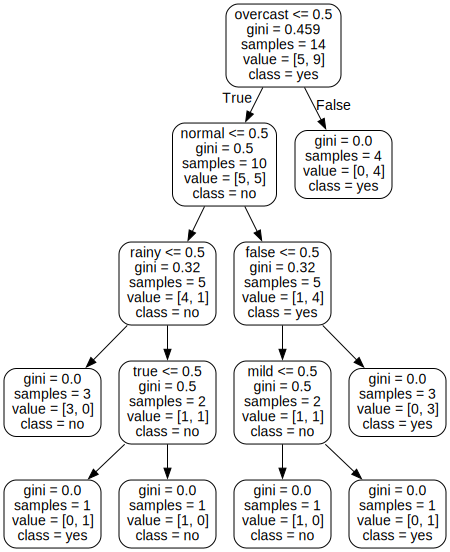

In [22]:
# Training the DT model with criterion as gini
DT_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 2)
DT_gini.fit(play_tennis_dataset_OHE, class_label)

# Drawing the decision tree using graphviz
graph_data = export_graphviz(DT_gini, rounded = True, feature_names = categories, class_names = ['no', 'yes'])
graph = graphviz.Source(graph_data)
graph

In [23]:
# # to save the decision tree image in '.png' format
# graph.format = 'png'
# graph.render('decisionTree_gini', view = False)

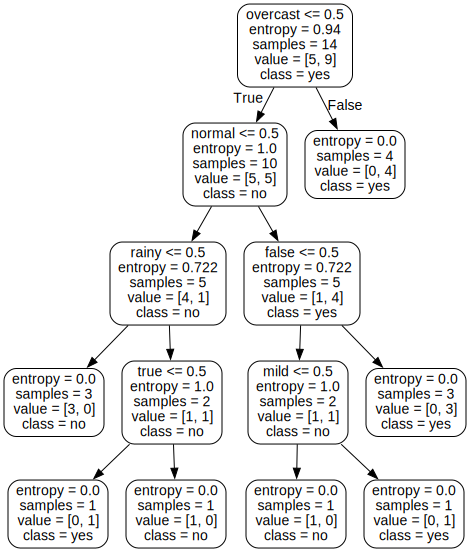

In [24]:
# Training the DT model with criterion as entropy
DT_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 2)
DT_entropy.fit(play_tennis_dataset_OHE, class_label)

# Drawing the decision tree with entropy as criterion
graph_data_entropy = export_graphviz(DT_entropy, rounded = True, feature_names = categories, class_names = ['no', 'yes'])
graph_entropy = graphviz.Source(graph_data_entropy)
graph_entropy

In [25]:
# to save the decision tree image in '.png' format
# graph_entropy.format = 'png'
# graph_entropy.render('decisionTree_entropy', view = False)

# Comparing time complexity of log and square

In [26]:
import timeit

# calculating time to compute log
print('Time to compute log of 0.5 is: ', timeit.timeit(stmt = 'log(0.5)', setup = 'from math import log'), ' seconds')

# calculate time to compute square
print('Time to compute square of 0.5 is: ', timeit.timeit(stmt = '0.5**2'), ' seconds')

Time to compute log of 0.5 is:  0.4773038999992423  seconds
Time to compute square of 0.5 is:  0.03546100002131425  seconds


# Computing the Decision Tree on Iris dataset

In [27]:
from sklearn.datasets import load_iris

# loading the data
data = load_iris()

In [28]:
# assigning the data to variables
xtrain = data.data
ytrain = data.target
columns = data.feature_names
class_labels = data.target_names

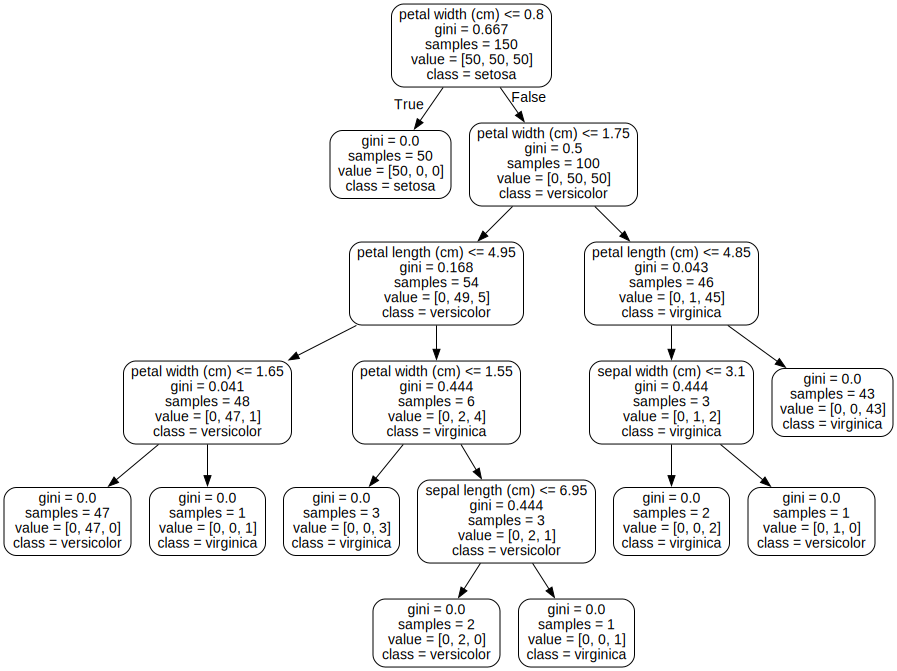

In [29]:
# Training the Decision Tree on Iris dataset
DT_iris = DecisionTreeClassifier(criterion = 'gini', random_state = 2)
DT_iris.fit(xtrain, ytrain)

# Drawing the decision tree with entropy as criterion
graph_data_gini = export_graphviz(DT_iris, rounded = True, feature_names = columns, class_names = class_labels)
graph_gini = graphviz.Source(graph_data_gini)
graph_gini

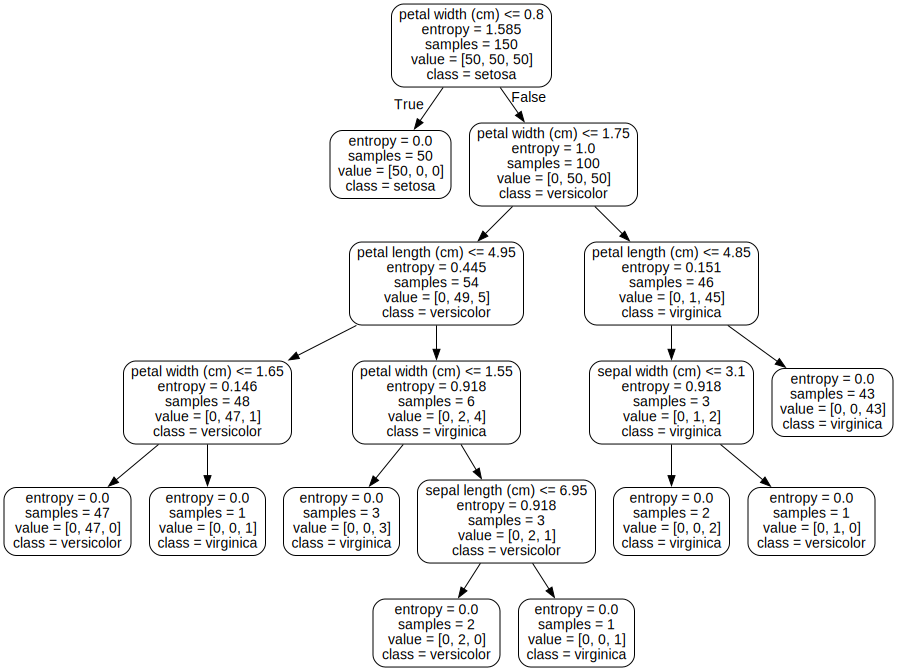

In [30]:
# Training the Decision Tree on Iris dataset
DT_iris_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 2)
DT_iris_entropy.fit(xtrain, ytrain)

# Drawing the decision tree with entropy as criterion
graph_data_entropy = export_graphviz(DT_iris_entropy, rounded = True, feature_names = columns, class_names = class_labels)
graph_entropy = graphviz.Source(graph_data_entropy)
graph_entropy